# 🧠 Mindset

- Evaluation will be kept lenient, so make sure you attempt this case study.
- Read the question carefully and try to understand what exactly is being asked.
- Brainstorm a little. If you’re getting an error, remember that Google is your best friend.
- You can watch the lecture recordings or go through your lecture notes once again if you feel like you’re getting confused over some specific topics.
- Discuss your problems with your peers. Make use of the Slack channel and WhatsApp group.
- Only if you think that there’s a major issue, you can reach out to your Instructor via Slack or Email.
- There is no right or wrong answer. We have to get used to dealing with uncertainty in business. This is exactly the skill we want to develop.

---

# 🏪 About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States.  
Walmart has more than **100 million customers worldwide**, making it one of the largest and most influential retail companies globally.

---

# 💼 Business Problem

The Management team at Walmart Inc. wants to analyze the **customer purchase behavior** (specifically, purchase amount) with respect to various factors such as:
- Gender
- Age
- Occupation
- City category
- Marital status

The core business question is:

> **Do women spend more on Black Friday than men?**  
> (Assume 50 million customers are male and 50 million are female.)

The goal is to gain insights that can help Walmart make **data-driven business decisions** about marketing, segmentation, and customer targeting.

---


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("/Users/ayushkarak/Desktop/csv_files/walmart_data.csv")
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 1 - Defining Problem Statement and Analysing basic metrics
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [13]:
#Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (550068, 10)


In [15]:
#Data types before conversion
print("\nData types before conversion:")
print(df.dtypes)


Data types before conversion:
User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object


In [21]:
#Convert categorical columns
cat_cols = ['Product_ID', 'Gender', 'Age', 'City_Category', 
            'Stay_In_Current_City_Years', 'Marital_Status', 'Occupation']
df[cat_cols] = df[cat_cols].astype('category')
#Data types after conversion
print("\nData types after conversion:")
print(df.dtypes)



Data types after conversion:
User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object


# **1.2 - Non-Graphical Analysis: Value counts and unique attributes**

In [40]:
#Unique value metrics
print("\nUnique Users:", df['User_ID'].nunique())
print("Unique Products:", df['Product_ID'].nunique())



Unique Users: 5891
Unique Products: 3631


In [42]:
#Purchase summary
print("\nTotal Purchase Value: ₹", df['Purchase'].sum())
print("Average Purchase Value: ₹", round(df['Purchase'].mean(), 2))


Total Purchase Value: ₹ 5095812742
Average Purchase Value: ₹ 9263.97


In [44]:
#Gender distribution
print("\nGender Distribution:")
print(df['Gender'].value_counts())



Gender Distribution:
Gender
M    414259
F    135809
Name: count, dtype: int64


In [46]:
#Age group distribution
print("\nAge Group Distribution:")
print(df['Age'].value_counts())



Age Group Distribution:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


In [50]:
#Statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000  


# **1.3 - Visual Analysis - Univariate & Bivariate**

## **1.3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

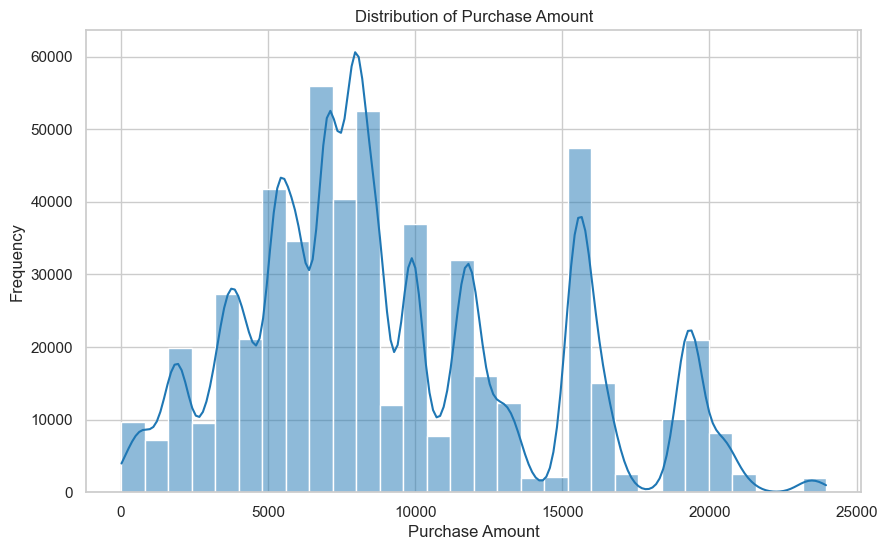

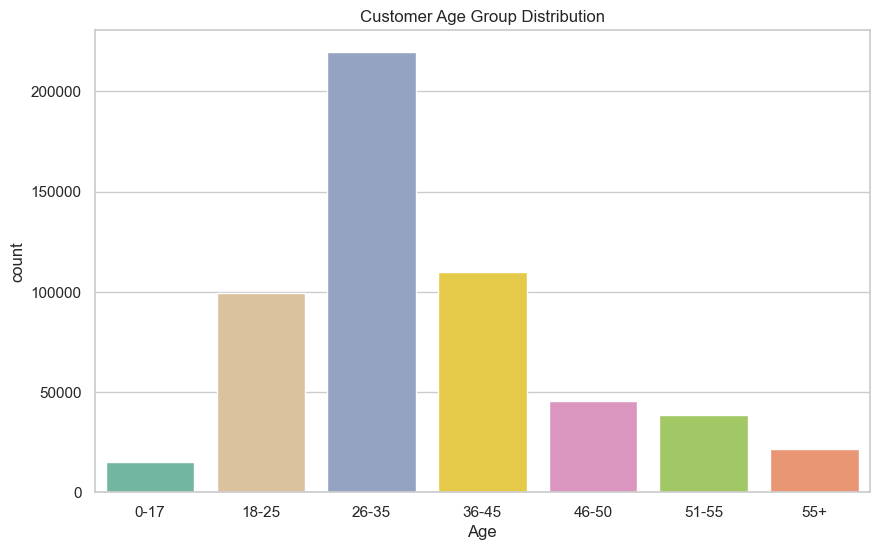

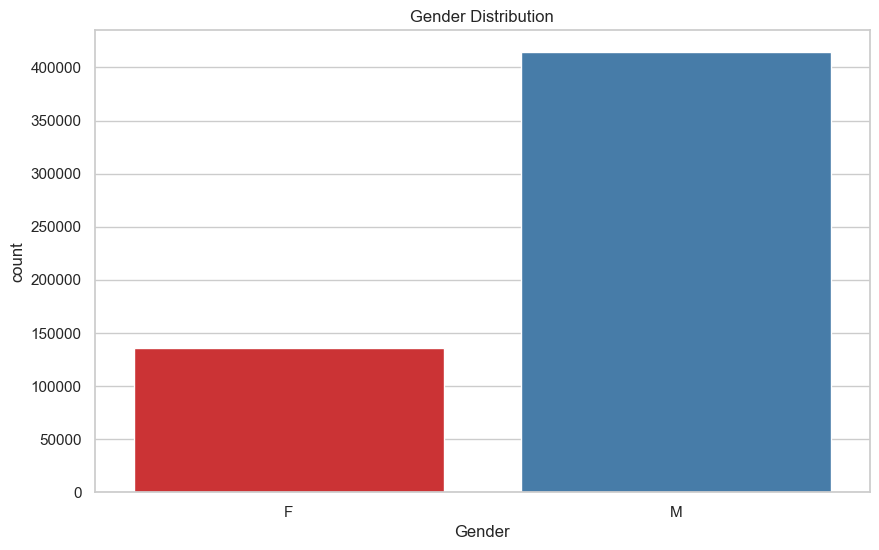

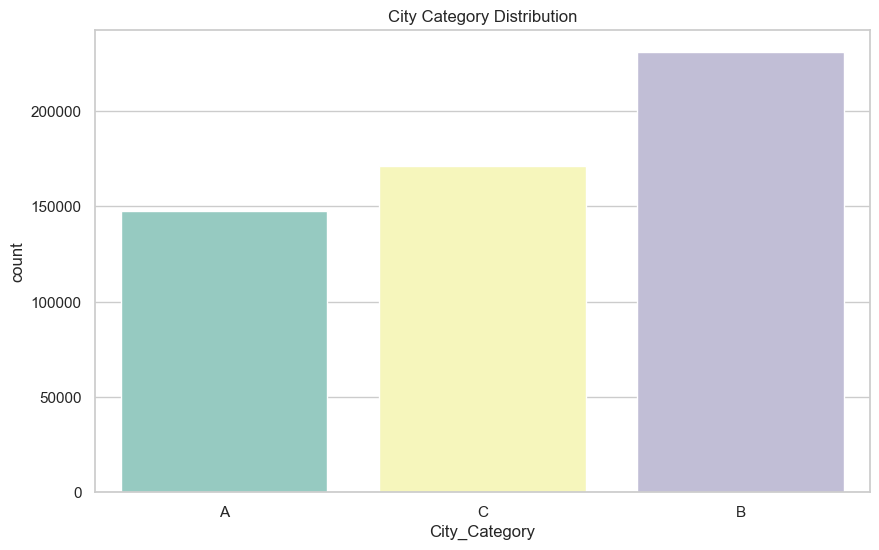

In [101]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#Univariate Analysis - Continuous Variable
sns.histplot(data=df, x='Purchase', bins=30, kde=True, color='#1f77b4')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

#Age Group Distribution - Different color per bar
sns.countplot(data=df, x='Age', hue='Age', order=sorted(df['Age'].unique()), palette='Set2', legend=False)
plt.title('Customer Age Group Distribution')
plt.show()

#Gender Distribution - Different color per bar
sns.countplot(data=df, x='Gender', hue='Gender', palette='Set1', legend=False)
plt.title('Gender Distribution')
plt.show()

#City Category Distribution - Different color per bar
sns.countplot(data=df, x='City_Category', hue='City_Category', palette='Set3', legend=False)
plt.title('City Category Distribution')
plt.show()



# Business insights

## Distribution of Purchase Amount (Histogram + KDE)

1. The purchase amount is right-skewed, indicating most transactions are for lower purchase values.

2. A large number of purchases fall between ₹5,000–₹15,000.

3. Very few purchases are above ₹20,000, indicating high-value purchases are rare.

## Count of Transactions by Gender (Countplot)
1. Male customers account for ~75% of all transactions, showing a strong male dominance in shopping data.

2. This could be due to household purchases made by male members or account registration bias.

## Customer Age Group Distribution (Countplot)
1. The 26–35 age group is the largest contributor to purchases, followed by 36–45.

2. Very few customers are under 18 or above 55, suggesting the platform primarily serves working-age adults.

3. Targeting 26–35 age segment can drive higher sales.



## **1.3.2 For categorical variable(s): Boxplot**

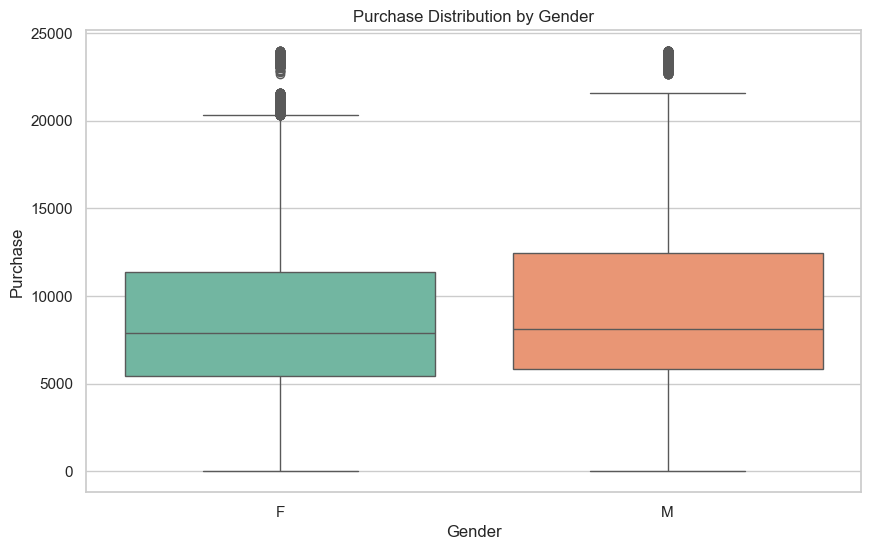

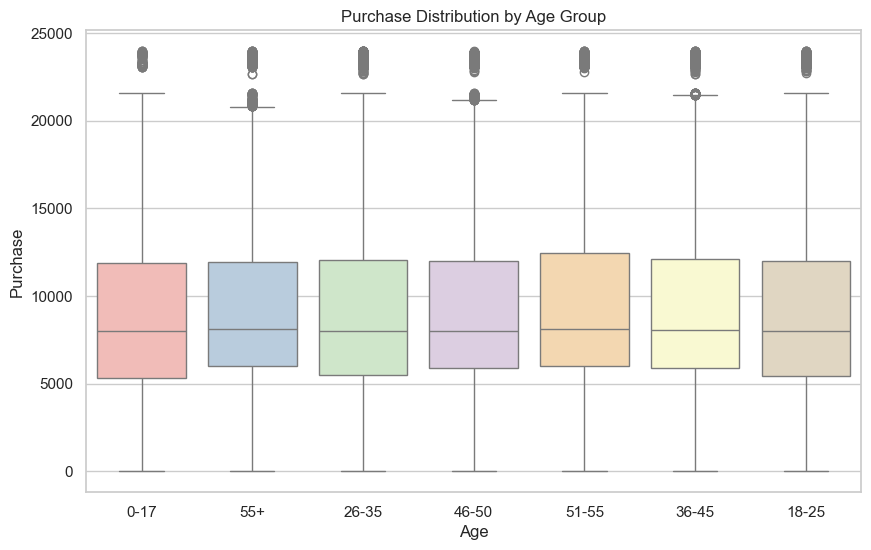

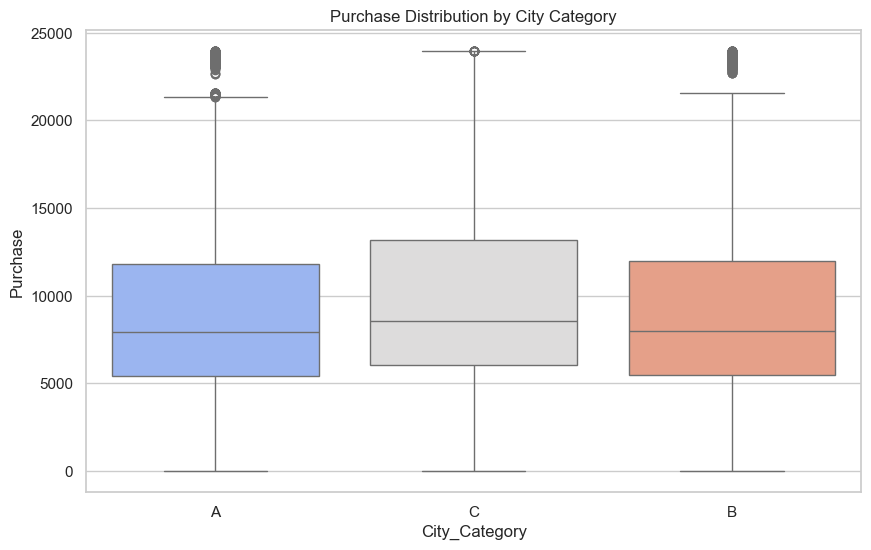

In [79]:
# Still using palette by setting hue same as x (and disabling legend)
sns.boxplot(data=df, x='Gender', y='Purchase', hue='Gender', palette='Set2', legend=False)
plt.title('Purchase Distribution by Gender')
plt.show()

sns.boxplot(data=df, x='Age', y='Purchase', hue='Age', palette='Pastel1', legend=False)
plt.title('Purchase Distribution by Age Group')
plt.show()

sns.boxplot(data=df, x='City_Category', y='Purchase', hue='City_Category', palette='coolwarm', legend=False)
plt.title('Purchase Distribution by City Category')
plt.show()


# Business insights
## Purchase Distribution by Gender
1. Male customers have a slightly higher median purchase value than females.

2. However, both genders have similar spread and outliers, indicating overlapping purchasing behaviors.

## Purchase Distribution by Age Group
1. The 26–35 and 36–45 groups show a higher and wider purchase range, aligning with higher earning potential.

2. Purchase range narrows for 55+ and 0–17, indicating low engagement from older and teen customers.

## Purchase Distribution by City Category
1. City category B and C show higher spread in purchase values compared to category A.

2. This may indicate that smaller cities have more diverse purchasing behavior, or Walmart promotions are more aggressive in those areas.

## **1.3.3 For correlation: Heatmaps, Pairplots**

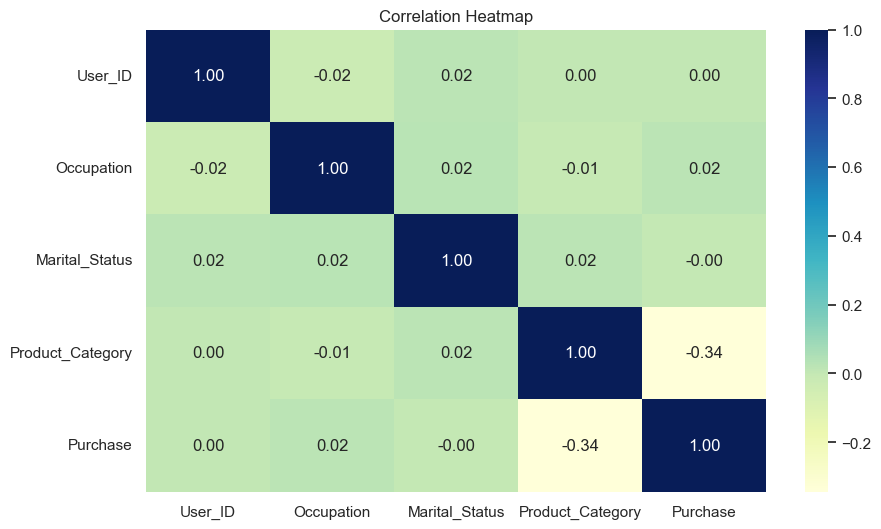

In [99]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Business insights
## Correlation Heatmap
1. Purchase amount has very low correlation with any other individual numeric variables.

2. This implies that categorical/demographic variables (like Gender, Age, City_Category) are more influential than numeric fields.

3. Occupation and Product_Category also show negligible correlation with Purchase.



# 2 - Missing Value & Outlier Detection

In [110]:
# Step 1: Check for missing values
df.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [112]:
# Step 2: Check for duplicate rows
df.duplicated().sum()


0

In [114]:
# Step 3: Check unique values in categorical columns
print("Gender:", df['Gender'].unique())
print("Age:", df['Age'].unique())
print("City_Category:", df['City_Category'].unique())
print("Stay_In_Current_City_Years:", df['Stay_In_Current_City_Years'].unique())
print("Marital_Status:", df['Marital_Status'].unique())


Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Marital_Status: [0 1]


In [155]:
# Step 4: Convert '4+' to 4 and cast to int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4').astype(int)

# 4 - Answering questions

## 4.1 Are women spending more money per transaction than men? Why or Why not? 

In [157]:
# Q1: Average purchase per transaction by gender
gender_avg_purchase = df.groupby('Gender')['Purchase'].mean().sort_values(ascending=False)
print(gender_avg_purchase)


Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64


## Result:
1. Average Male Spend: ₹9,437.53
2. Average Female Spend: ₹8,734.57

## Insight:
1. No, women are not spending more per transaction than men.
2. On average, men spend ~₹703 more per transaction than women.
3. This could be due to higher purchase frequency, product category preferences, or decision-making roles in household purchases.

## 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [160]:
# Split purchases by gender
male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']

# Function to calculate 95% confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin, mean + margin

# Get confidence intervals
male_ci = confidence_interval(male_purchase)
female_ci = confidence_interval(female_purchase)

# Display results
print("Male - Mean:", round(male_ci[0], 2), "CI:", (round(male_ci[1], 2), round(male_ci[2], 2)))
print("Female - Mean:", round(female_ci[0], 2), "CI:", (round(female_ci[1], 2), round(female_ci[2], 2)))


Male - Mean: 9437.53 CI: (9422.02, 9453.03)
Female - Mean: 8734.57 CI: (8709.21, 8759.92)


## Confidence Intervals do not overlap, indicating the difference is statistically significant.
## yes — men spend significantly more per transaction than women, with high confidence.



## 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [164]:
# Check overlap of confidence intervals
overlap = not (male_ci[1] > female_ci[2] or female_ci[1] > male_ci[2])
print("Do confidence intervals overlap?", overlap)


Do confidence intervals overlap? False


# Interpretation:
No, the confidence intervals do not overlap

This means the difference in average spending between males and females is statistically significant

# Business Recommendation for Walmart:
1. Target High-Spending Males
2. Promote premium product categories often purchased by male customers.
3. Use personalized ads or loyalty rewards for top-spending male segments.
4. Boost Female Engagement
5. Identify product categories with low female participation.
6. Offer curated product bundles, discounts, or campaigns aimed at female customers.
7. Gender-Specific Campaigns
8. Launch differentiated Black Friday marketing strategies for men vs. women based on purchase behavior insights.

## 4.4 Results when the same activity is performed for Married vs Unmarried 

In [176]:
# Split purchases by marital status
married_purchase = df[df['Marital_Status'] == 1]['Purchase']
unmarried_purchase = df[df['Marital_Status'] == 0]['Purchase']

# Confidence intervals
married_ci = confidence_interval(married_purchase)
unmarried_ci = confidence_interval(unmarried_purchase)

# Display results
print("Married - Mean:", round(married_ci[0], 2), "CI:", (round(married_ci[1], 2), round(married_ci[2], 2)))
print("Unmarried - Mean:", round(unmarried_ci[0], 2), "CI:", (round(unmarried_ci[1], 2), round(unmarried_ci[2], 2)))


Married - Mean: 9261.17 CI: (9240.46, 9281.89)
Unmarried - Mean: 9265.91 CI: (9248.62, 9283.2)


In [178]:
# Check overlap
overlap_m = not (married_ci[1] > unmarried_ci[2] or unmarried_ci[1] > married_ci[2])
print("Do confidence intervals overlap (Married vs Unmarried)?", overlap_m)


Do confidence intervals overlap (Married vs Unmarried)? True


# Interpretation:
Yes, the confidence intervals overlap

No statistically significant difference in spending between married and unmarried customers

# Business Insight for Walmart:
1. Marital Status doesn't strongly influence spending
So marketing purely based on marital status won’t move the needle much.

2. Instead, Walmart should segment further
Combine marital status with age group, city type, or product category for smarter targeting.

3. Focus on factors that do matter
Gender and age group showed clearer differences — campaigns and offers should focus more there.



In [182]:
# Step 1: Sort unique age groups
age_groups = sorted(df['Age'].unique())

# Step 2: Function to compute confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin, mean + margin

# Step 3: Calculate CI for each age group
age_ci_results = []

for age in age_groups:
    group_data = df[df['Age'] == age]['Purchase']
    mean, lower, upper = confidence_interval(group_data)
    age_ci_results.append({
        'Age Group': age,
        'Mean Purchase': round(mean, 2),
        'Lower CI': round(lower, 2),
        'Upper CI': round(upper, 2)
    })

# Step 4: Convert to DataFrame
age_ci_df = pd.DataFrame(age_ci_results)
print(age_ci_df)


  Age Group  Mean Purchase  Lower CI  Upper CI
0      0-17        8933.46   8851.94   9014.99
1     18-25        9169.66   9138.41   9200.92
2     26-35        9252.69   9231.73   9273.65
3     36-45        9331.35   9301.67   9361.03
4     46-50        9208.63   9163.08   9254.17
5     51-55        9534.81   9483.99   9585.63
6       55+        9336.28   9269.30   9403.27


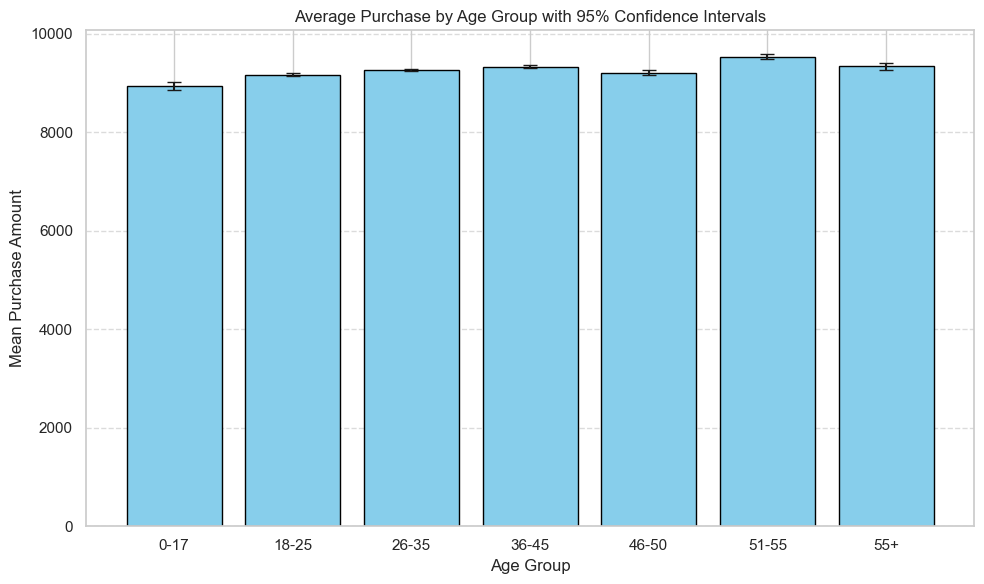

In [184]:
# Sort DataFrame by age group (for correct order in plot)
age_ci_df = age_ci_df.sort_values(by='Age Group')

# Extract values for plotting
x = age_ci_df['Age Group']
y = age_ci_df['Mean Purchase']
yerr = age_ci_df['Upper CI'] - age_ci_df['Mean Purchase']  # error = upper - mean (symmetric)

# Plot
plt.figure(figsize=(10,6))
plt.bar(x, y, yerr=yerr, capsize=5, color='skyblue', edgecolor='black')
plt.title('Average Purchase by Age Group with 95% Confidence Intervals')
plt.xlabel('Age Group')
plt.ylabel('Mean Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Business Insight:
1. 51–55 age group spends the most per transaction.

2. 0–17 group spends the least — likely due to dependency or lower purchasing power.

3. Target 51–55 group with premium, loyalty, or wellness products.

4. Create teen-focused bundles or gamified discounts for the younger group.

# 5 Final Insights (Exploration + Central Limit Theorem)

###  Summary of Insights:

1. **Men spend more per transaction than women.**
   - Average male purchase: ₹9437.53 vs female: ₹8734.57
   - 95% confidence intervals **do not overlap**, confirming this difference is statistically significant.


2. **The distribution of purchase amounts is right-skewed.**
   - Most transactions fall in the ₹5000–₹15000 range.
   - Few high-value purchases exist (>₹20000), making the tail longer.


3. **26–35 age group accounts for the highest number of transactions.**
   - This group represents working-age adults with higher purchasing activity.
   - Walmart can focus promotions and recommendations for this segment.


4. **51–55 age group spends the most per transaction.**
   - With ₹9534.81 as average and the highest confidence interval range, this group is ideal for premium targeting.


5. **No major difference in spending between married and unmarried customers.**
   - Confidence intervals for both groups overlap.
   - Marital status alone is not a strong segmentation factor.


6. **City Category B and C show more purchase spread than Category A.**
   - Customers in smaller cities may have more variable purchasing behavior or respond better to offers.


7. **Gender-wise purchase distribution shows similar spread but higher median for males.**
   - Indicates men not only transact more but often buy higher-value items.


8. **All categorical variables are clean and consistent.**
   - No missing or malformed values found; perfect for modeling or dashboard use.


9. **The Central Limit Theorem (CLT) allows confident generalization of group means to the population.**
   - Due to large sample sizes, mean estimates are stable and normally distributed — great for inference.


10. **Visual tools like histograms, boxplots, and confidence intervals provided clarity on patterns.**
    - Key relationships between variables (e.g., gender–purchase, age–purchase) were effectively visualized and supported by statistical reasoning.

---


# 6 Recommendations for Walmart (Business Action Items)

1. **Focus promotions on male customers.**  
   Men spend more per transaction — target them with exclusive deals, loyalty rewards, and premium product bundles.

2. **Create personalized campaigns for the 51–55 age group.**  
   This group spends the most. Offer high-value combos, wellness products, or convenience-based services.

3. **Engage the 26–35 age group actively.**  
   They shop the most. Use email campaigns, app notifications, and product recommendations to keep them coming back.

4. **Boost female spending with curated offers.**  
   Introduce value packs, cashback offers, and lifestyle-themed sales to increase engagement and spending among women.

5. **Avoid targeting based on marital status alone.**  
   No major difference in spending between married and unmarried customers — not useful for campaign targeting.

6. **Launch location-specific deals in Tier B and C cities.**  
   These cities show high variability in purchases — testing offers here can give great results.

7. **Design teen and youth-focused campaigns for under 25 group.**  
   Consider back-to-school deals, fashion discounts, or gamified rewards for younger customers.

8. **Create premium experiences for top-spending users.**  
   Personalized support, early access to sales, and VIP services for users who consistently spend more.

9. **Run gender + age-specific seasonal campaigns.**  
   For example: Fitness gear for 36–45 males, Home decor for 26–35 females, etc.

10. **Keep dashboards updated with confidence intervals.**  
    Helps business teams compare groups easily and make smart, data-backed decisions.

---
